# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
#import the pandas module
import pandas as pd

#import the module random
import random as ra

import matplotlib.pyplot as plt

import numpy as np


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
#function that simulates rolling a dice 10 times

def roll_dice_nTimes(x):
    #empty list to store number of dice rolls
    dice_roll = []
    roll = []
    i=1
    for i in range(1,x+1):
        #appends random values from 1 to 6 to an empty list named dice_roll
        dice_roll.append(ra.randrange(1,7))
        roll.append(i)
    #creates a datframe with the roll and value columns
    dice_rool_df = pd.DataFrame({'roll':roll,'value':dice_roll})
    return dice_rool_df
        

In [4]:
dice_rool_df = roll_dice_nTimes(10)
dice_rool_df

,roll,value
0,1,4
1,2,4
2,3,5
3,4,6
4,5,2
5,6,1
6,7,3
7,8,1
8,9,1
9,10,5


#### 2.- Plot the results sorted by value.

In [5]:
""""break an internal Pandas security mechanism - aligning by index, which takes care of the data consistency.
So assigning 1D Numpy array or a vanilla Python list would do the trick,
because both of them don't have an index, so Pandas can't do alignment"""

#sort only the values of the column dice roll without affecting the column N rolls, break an internal Pandas security mechanism
dice_rool_df['value'] = dice_rool_df['value'].sort_values(ascending=True).values
dice_rool_df.head(10)

,roll,value
0,1,1
1,2,1
2,3,1
3,4,2
4,5,3
5,6,4
6,7,4
7,8,5
8,9,5
9,10,6


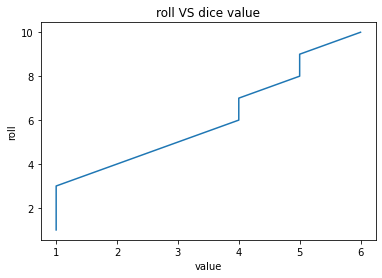

In [6]:
x = dice_rool_df['value']
y = dice_rool_df['roll']

plt.xlabel("value")
plt.ylabel("roll")
plt.title('roll VS dice value')
plt.plot(x,y)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:>

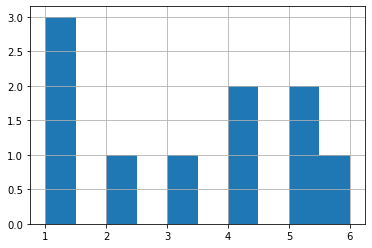

In [8]:
# your code here
#frequency distribution is the histogram
dice_rool_df['value'].hist()

In [8]:
"""
your comments here
The number 5 is the most frequent dice value (histogram), in the plot above the histogram 
we can see that 5 is the number that apears more times than 6,3 and 1 have the same number, and  2 have the lowest number.
In the histogram is easy the frequency of each dice value from each roll.
"""


'\nyour comments here\nThe number 5 is the most frequent dice value (histogram), in the plot above the histogram \nwe can see that 5 is the number that apears more times than 6,3 and 1 have the same number, and  2 have the lowest number.\nIn the histogram is easy the frequency of each dice value from each roll.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
def dice_roll_mean(l):
  i = 0  
  total = 0
  for val in l:
    total = total + val
    i+=1
  return total/i

In [10]:
dice_roll_mean(dice_rool_df['value'])

3.0

In [11]:
# your code here
(dice_rool_df['value'].sum())/(dice_rool_df['value'].count())


3.0

In [12]:
dice_rool_df['value'].describe()

count    10.000000
mean      3.000000
std       1.885618
min       1.000000
25%       1.250000
50%       2.500000
75%       4.750000
max       6.000000
Name: value, dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [13]:
# your code here
#frequency distribution
freq_distr = dice_rool_df['value'].value_counts()
#freq_distr.iloc[0]
counter = 0
sum = 0
for i in freq_distr:
    sum = sum + i
    counter+=1
#prints the mean of the frequency distribution  values
print('the mean value of the frequency distribution is : ',sum/counter)

the mean value of the frequency distribution is :  1.6666666666666667


In [14]:
#calculates the frequency distribution mean
freq_distr_mean = (freq_distr.sum() )/(freq_distr.count()) 
freq_distr_mean

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [15]:
# test dataframe for the function that calculates the median value
test_df = pd.DataFrame({'X':[1,2,3,4,5,6]})
type(test_df['X'])
panda_series = test_df['X']

In [16]:
#function that calculates the median of a dataframe or panda series assuming that the values are sorted
def median(x):
    if len(x)%2 == 0:
        med =(x.iloc[(int(len(x)/2))-1]+x.iloc[int(len(x)/2)])/2
        return med
    else: 
        med= x.iloc[int(len(x)/2)] 
        return med

In [17]:
print('The median value of the dice rolls is: ',median(dice_rool_df['value']))

The median value of the dice rolls is:  2.5


In [18]:
#using the median function to prove that my function is right
dice_rool_df['value'].median()

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [19]:
# your code here
# calculated the lower quartile -> the position where 25% of my data "has passed"
q1 = np.quantile(panda_series, 0.25)
print("the first quartile is", q1)
q2 = np.quantile(panda_series, 0.50)
print("the second quartile is",q2)
q3 = np.quantile(panda_series, 0.75)
print("the third quartile is", q3)

the first quartile is 2.25
the second quartile is 3.5
the third quartile is 4.75


In [20]:
#4th quartile
panda_series.iloc[2]

3

In [21]:
1.For a serie with a total of odd numbers:
1.1If the median index is even the 1th quartile is in the index half of the median index
1.2If the median index is odd (ex 5) the 1th quartile is in the index half of the median index (2.5) that is the same as index (2+3/2)

2.For a serie with a total of even numbers:
2.1 If the median index is (3.5) the 1th quartile is in the index half of the median index (3.5/2) that is the same as index (3+4/2)
2.2If the median index is ()

SyntaxError: invalid syntax (<ipython-input-21-3898f127e6bd>, line 1)

In [22]:
#assuming that the values are sorted
#[1,2,3,4,5,6,7,8]
# x is the quartile and y the dataframe
def quart(x,y):
    #4th quartile
    if x == 4:
        return y.iloc[-1]
    #2th quartile
    elif x == 2:
        return median(y)
    #1th quartile
    elif x==1:
          if len(y)%2 == 0:
                quart =((y.iloc[(int(len(y)/4))]+y.iloc[int(len(y)/4)])/2)
                return quart
    #3th quartile
    elif x== 3:
        if len(y)%2 == 0:
            quart= y.iloc[int(len(y)/2)] 
            return quart
        
    

In [23]:
quart(1,panda_series)

2.0

In [24]:
panda_series.iloc[(int(len(panda_series)/4+ 0.5 -1))]

2

In [25]:
q1 = np.quantile(panda_series, 0.25)
print("the first quartile is", q1)

the first quartile is 2.25


In [26]:
#solução 1 -> não está totalmente correcta
new_list = list(panda_series)
index = len(list(panda_series))
first = int(index*0.25)
new_list[first]

2

In [27]:
#solução 2
def quartile1(x):
    if len(x)%2==0:
        return x[len(x)/4 + 0.5 -1]
    elif len(x)%2!=0:
        return (x[len(x)/4 - 0.75 - 1]+x[len(x)/4 -0.75])/2

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [28]:
# your code here
roll_the_dice_hundred_df = pd.read_csv('C:\\Users\\guilh\\Descriptive-Stats\\data\\roll_the_dice_hundred.csv')
roll_the_dice_hundred_df.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


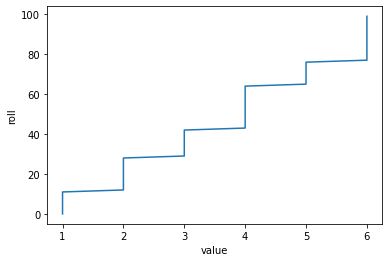

In [29]:
roll_the_dice_hundred_df['value'] = roll_the_dice_hundred_df['value'].sort_values(ascending=True).values
x = roll_the_dice_hundred_df['value']
y = roll_the_dice_hundred_df['roll']

plt.xlabel("value")
plt.ylabel("roll")
plt.plot(x,y)

In [30]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [31]:
#functions defined in challenge 2 to calculate the mean
#(roll_the_dice_hundred_df['value'].sum())/(roll_the_dice_hundred_df['value'].count())

dice_roll_mean(roll_the_dice_hundred_df['value'])

3.74

In [32]:
roll_the_dice_hundred_df.describe()

,Unnamed: 0,roll,value
count,100.000000,100.000000,100.000000
mean,49.500000,49.500000,3.740000
std,29.011492,29.011492,1.703354
min,0.000000,0.000000,1.000000
25%,24.750000,24.750000,2.000000
50%,49.500000,49.500000,4.000000
75%,74.250000,74.250000,5.000000
max,99.000000,99.000000,6.000000


#### 3.- Now, calculate the frequency distribution.


In [33]:
# your code here

dice_hundred_freqDist= roll_the_dice_hundred_df['value'].value_counts()
dice_hundred_freqDist.head()
#!!!!!!!!!!!The freq is from 0 to 1 correct this!!!

6    23
4    22
2    17
3    14
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

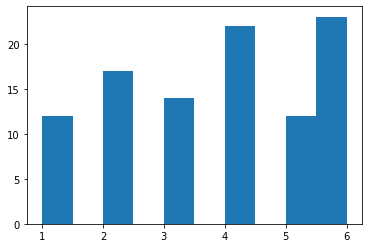

In [34]:
# your code here
plt.hist(roll_the_dice_hundred_df['value'])

In [35]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [36]:


roll_thousand = pd.read_csv('C:\\Users\guilh\\Descriptive-Stats\\data\\roll_the_dice_thousand.csv')

roll_thousand.value_counts()

Unnamed: 0  roll  value
999         999   6        1
328         328   3        1
341         341   3        1
340         340   4        1
339         339   3        1
                          ..
661         661   3        1
660         660   4        1
659         659   6        1
658         658   2        1
0           0     5        1
Length: 1000, dtype: int64

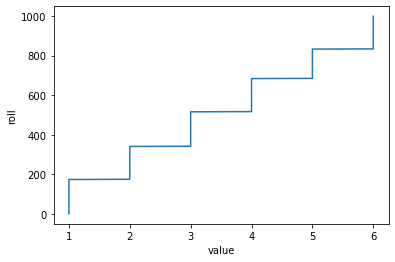

In [37]:
roll_thousand['value'] = roll_thousand['value'].sort_values(ascending=True).values
x = roll_thousand['value']
y = roll_thousand['roll']

plt.xlabel("value")
plt.ylabel("roll")
plt.plot(x,y)

In [38]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [39]:
# your code here
ages = pd.read_csv('C:\\Users\guilh\\Descriptive-Stats\\data\\ages_population.csv')

freq_distr_ages = ages.value_counts()
freq_distr_ages

observation
39.0           45
41.0           36
30.0           34
35.0           33
43.0           32
               ..
69.0            1
70.0            1
4.0             1
71.0            1
82.0            1
Length: 72, dtype: int64

In [40]:
ages.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


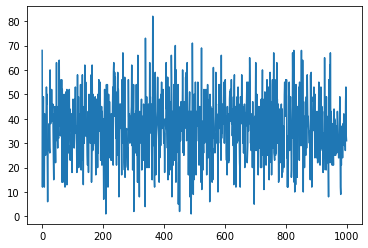

In [41]:
plt.plot(ages)

In [42]:
#the mean is between 30 and 40 years old
#the standard deviation is 10 or 15

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [43]:
# your code here
ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [44]:
"""
your comments here

Yes they fall inside the range i guessed
"""


'\nyour comments here\n\nYes they fall inside the range i guessed\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [45]:
# your code here
ages2 = pd.read_csv('C:\\Users\guilh\\Descriptive-Stats\\data\\ages_population2.csv')

freq_distr_ages2 = ages2.value_counts()
freq_distr_ages2

observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
19.0             3
35.0             3
36.0             2
dtype: int64

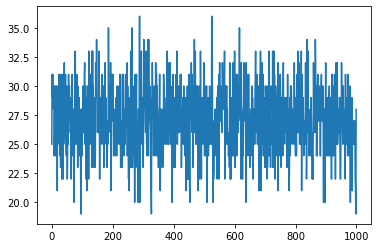

In [48]:
plt.plot(ages2)

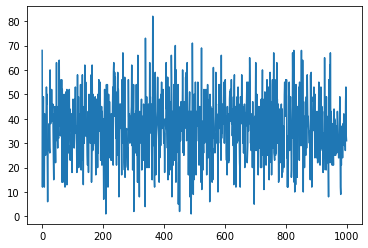

In [47]:
plt.plot(ages)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here

the frequency distribution of the file ages_population seems that the values are more condensed in comparasion with the plot of ages_population2,
the values in ages_population2 lokk more uniform in the distribution
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [12]:
# your code here
ages2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [13]:
ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""
your comments here
ages_population2 have a lower standard deviation compared to ages_population
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [15]:
# your code here
ages3 = pd.read_csv('C:\\Users\guilh\\Descriptive-Stats\\data\\ages_population3.csv')
ages3.value_counts()

observation
32.0           37
35.0           31
37.0           31
39.0           29
36.0           26
               ..
8.0             1
7.0             1
5.0             1
76.0            1
1.0             1
Length: 75, dtype: int64

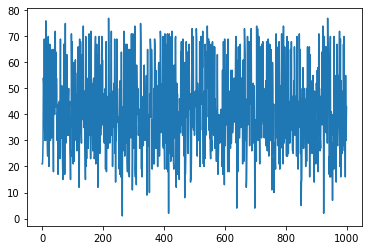

In [17]:
plt.plot(ages3)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [18]:
# your code here
ages3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here
#i calculated the quartiles above!!

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""